In [11]:
#Load the libraries
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
import warnings
warnings.filterwarnings('ignore')

Function used for Cleansing the data

In [12]:
# This function will take one text argument and will returm stemming value 
# (stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form )

def Stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [13]:
# Removing the html strips
# BeautifulSoup used for web scraping purposes to pull the data out of HTML and XML files
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the text between square brackets 
def remove_text_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text using above two functions
def denoise_text(text):
    text = strip_html(text)
    text = remove_text_between_square_brackets(text)
    return text

In [14]:
#Removing the stopwords

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [15]:
# Removing special characters

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [16]:
tokenizer=ToktokTokenizer()
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from google.colab import files

uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset (1).csv


Loading the dataset

In [17]:
#importing the training data

imdb_data=pd.read_csv(io.BytesIO(uploaded['IMDB Dataset.csv']))
print('Shape of dataset is :',imdb_data.shape)
imdb_data.head(10)

Shape of dataset is : (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [18]:
#Summary of the dataset

imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [19]:
#sentiment count

imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [20]:
# Training dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]

# Testing dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]

In [21]:
#labeling the sentient data
lb=LabelBinarizer()

#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])

In [22]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]

Cleansing the data using above defined Functions

In [23]:
imdb_data['review']=imdb_data['review'].apply(denoise_text)

In [24]:
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [25]:
imdb_data['review']=imdb_data['review'].apply(Stemmer)

In [26]:
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

Transforming text into feature vector using Countvectorizer and Tf-Idf and making the models using both

In [27]:
#Count vectorizer for bag of words

#It is used to transform a given text into a vector on the basis of the frequency of each word that occurs in the entire text
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

In [28]:
#Tf-Idf vectorizer

#Tf-IdfTransforms text to feature vectors that can be used as input to estimator
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

#transformed train reviews
tv_train_reviews=tv.fit_transform(train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(test_reviews)

Algorithm used

Logical Regresseion


In [29]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

#Fitting the model for Count vectorizer for bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)

#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)

In [30]:
#Predicting the model for Count vectorizer for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)

#Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)

In [31]:
#Accuracy score for Count vectorizer for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("Logical Regression Count Vectorizer Accuracy score in % :",lr_bow_score*100)

#Accuracy score for Count vectorizer for bag of words
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("Logical Regression TFIDF Accuracy score in % :",lr_tfidf_score*100)

Logical Regression Count Vectorizer Accuracy score in % : 75.12
Logical Regression TFIDF Accuracy score in % : 75.0


In [32]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print("-------Logical Regression Count Vectorizer Report-------")
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print("-------Logical Regression TFIDF Vectorizer Report-------")
print(lr_tfidf_report)

-------Logical Regression Count Vectorizer Report-------
              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

-------Logical Regression TFIDF Vectorizer Report-------
              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



CONFUSION MATRIX: CountVectorizer for Bag of Words


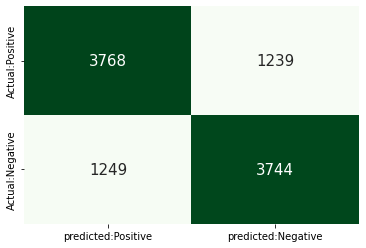

CONFUSION MATRIX: TFIDF Vectorizer


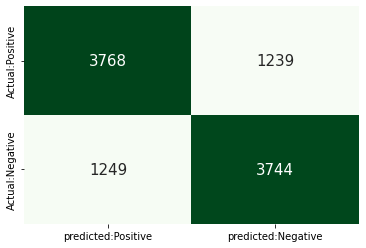

In [33]:
#confusion matrix for bag of words
lr_cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
lr_confusion_mat_bow=pd.DataFrame(data=lr_cm_bow, columns=['predicted:Positive','predicted:Negative'], index=['Actual:Positive','Actual:Negative'])
sns.heatmap(lr_confusion_mat_bow, annot=True,cmap='Greens',fmt='d',cbar=False, annot_kws={'size':15})
print("CONFUSION MATRIX: CountVectorizer for Bag of Words")
plt.show()

#confusion matrix for tfidf features
lr_cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
lr_confusion_mat_tfidf=pd.DataFrame(data=lr_cm_bow, columns=['predicted:Positive','predicted:Negative'], index=['Actual:Positive','Actual:Negative'])
sns.heatmap(lr_confusion_mat_tfidf, annot=True,cmap='Greens',fmt='d',cbar=False, annot_kws={'size':15})
print("CONFUSION MATRIX: TFIDF Vectorizer")
plt.show()

Linear SVM

In [34]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#fitting the svm for Count vectorizer for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)

#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)

In [35]:
#Predicting the model for Count vectorizer for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)

#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)

In [36]:
#Accuracy score for Count vectorizer for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("Linear SVM Count Vectorizer Accuracy score in %  :",svm_bow_score*100)

#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("Linear SVM TFIDF Accuracy score in % :",svm_tfidf_score*100)

Linear SVM Count Vectorizer Accuracy score in %  : 58.29
Linear SVM TFIDF Accuracy score in % : 51.12


In [37]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print("-------Linear SVM Count Vectorizer Report-------")
print(svm_bow_report)

#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print("-------Linear SVM TFIDF Vectorizer Report-------")
print(svm_tfidf_report)

-------Linear SVM Count Vectorizer Report-------
              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

-------Linear SVM TFIDF Vectorizer Report-------
              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



CONFUSION MATRIX: CountVectorizer for Bag of Words


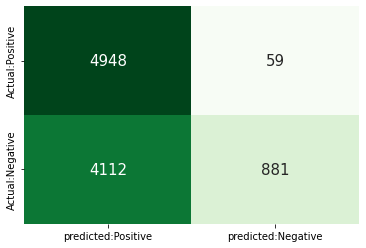

CONFUSION MATRIX: TFIDF Vectorizer


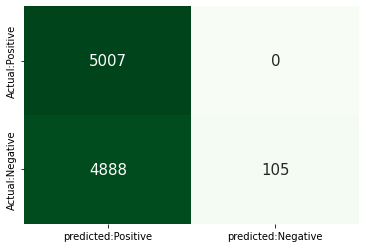

In [38]:
#confusion matrix for bag of words
svm_cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
svm_confusion_mat_bow=pd.DataFrame(data=svm_cm_bow, columns=['predicted:Positive','predicted:Negative'], index=['Actual:Positive','Actual:Negative'])
sns.heatmap(svm_confusion_mat_bow, annot=True,cmap='Greens',fmt='d',cbar=False, annot_kws={'size':15})
print("CONFUSION MATRIX: CountVectorizer for Bag of Words")
plt.show()

#confusion matrix for tfidf features
svm_cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
svm_confusion_mat_tfidf=pd.DataFrame(data=svm_cm_tfidf, columns=['predicted:Positive','predicted:Negative'], index=['Actual:Positive','Actual:Negative'])
sns.heatmap(svm_confusion_mat_tfidf, annot=True,cmap='Greens',fmt='d',cbar=False, annot_kws={'size':15})
print("CONFUSION MATRIX: TFIDF Vectorizer")
plt.show()

Naive Bayes

In [39]:
#training the model
mnb=MultinomialNB()

#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)

#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)

In [40]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)

#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [41]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("Naive Bayes Count Vectorizer Accuracy score in % :",mnb_bow_score*100)

#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("Naive Bayes TFIDF Accuracy score in % :",mnb_tfidf_score*100)

Naive Bayes Count Vectorizer Accuracy score in % : 75.1
Naive Bayes TFIDF Accuracy score in % : 75.09


In [42]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print("-------Naive Bayes Count Vectorizer Report-------")
print(mnb_bow_report)

#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print("-------Naive Bayes TFIDF Vectorizer Report-------")
print(mnb_tfidf_report)

-------Naive Bayes Count Vectorizer Report-------
              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

-------Naive Bayes TFIDF Vectorizer Report-------
              precision    recall  f1-score   support

    Positive       0.75      0.76      0.75      4993
    Negative       0.75      0.74      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



CONFUSION MATRIX: CountVectorizer for Bag of Words


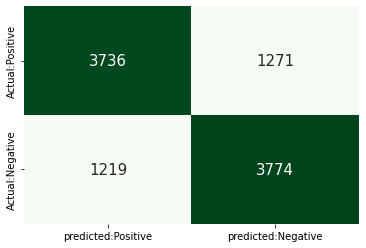

CONFUSION MATRIX: TFIDF Vectorizer


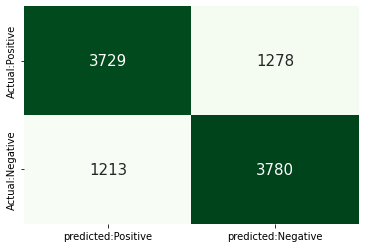

In [43]:
#confusion matrix for bag of words
nv_cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
nv_confusion_mat_bow=pd.DataFrame(data=nv_cm_bow, columns=['predicted:Positive','predicted:Negative'], index=['Actual:Positive','Actual:Negative'])
sns.heatmap(nv_confusion_mat_bow, annot=True,cmap='Greens',fmt='d',cbar=False, annot_kws={'size':15})
print("CONFUSION MATRIX: CountVectorizer for Bag of Words")
plt.show()

#confusion matrix for tfidf features
nv_cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
nv_confusion_mat_tfidf=pd.DataFrame(data=nv_cm_tfidf, columns=['predicted:Positive','predicted:Negative'], index=['Actual:Positive','Actual:Negative'])
sns.heatmap(nv_confusion_mat_tfidf, annot=True,cmap='Greens',fmt='d',cbar=False, annot_kws={'size':15})
print("CONFUSION MATRIX: TFIDF Vectorizer")
plt.show()

Accuracy comparison for Logical Regression, Linear SVM and Naive Bayes for both Count Vectorizer and TFIDF Vectorizer

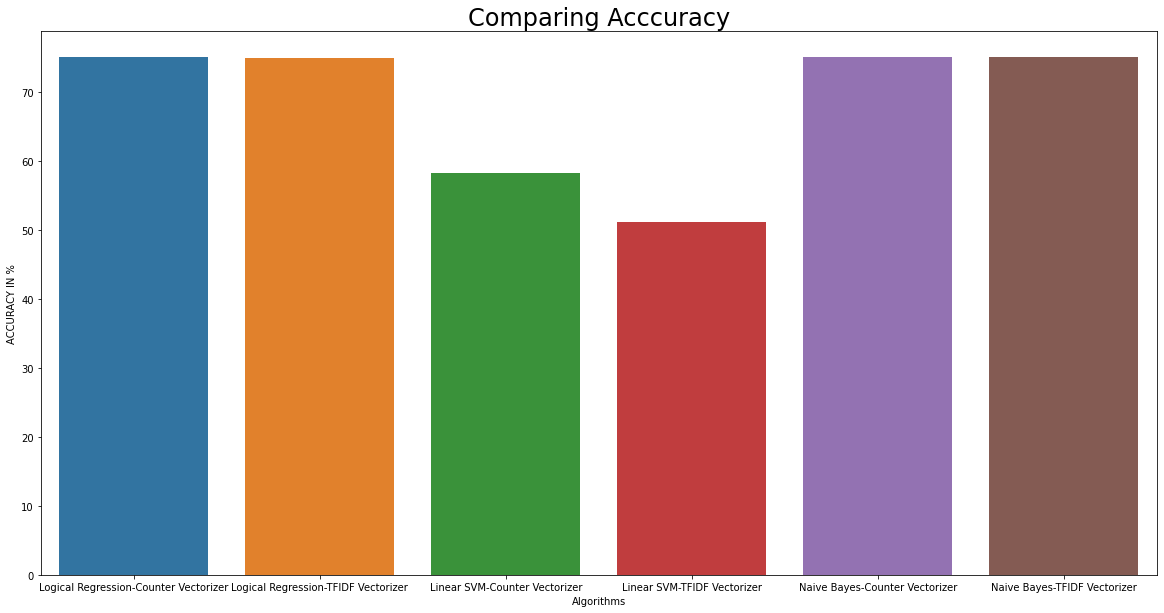

In [44]:
A=['Logical Regression-Counter Vectorizer','Logical Regression-TFIDF Vectorizer','Linear SVM-Counter Vectorizer','Linear SVM-TFIDF Vectorizer','Naive Bayes-Counter Vectorizer','Naive Bayes-TFIDF Vectorizer']
B=[lr_bow_score*100,lr_tfidf_score*100,svm_bow_score*100,svm_tfidf_score*100,mnb_bow_score*100,mnb_tfidf_score*100]
plt.figure(figsize=(20,10))
sns.barplot(x=A, y=B)
plt.title('Comparing Acccuracy',fontsize=24)
plt.xlabel('Algorithms')
plt.ylabel('ACCURACY IN %')
plt.show()